# Predicting Wine Quality

Problem: Wine Quality Prediction

Description: The Wine Quality Dataset contains physicochemical features of different wines along with their quality ratings. Your task is to develop a model that can predict the quality of a wine based on its features. The quality rating ranges from 0 to 10, with higher values indicating better quality.

Objective: Build a predictive model that accurately predicts the quality rating of wines using the provided features.

Steps to Approach the Problem:

Data Exploration: Begin by exploring the dataset to understand its structure and the distribution of features. Analyze the range of quality ratings and the relationships between the features and the target variable.

Data Preprocessing: Perform any necessary data preprocessing steps, such as handling missing values, dealing with outliers, and scaling the numeric features if required. It's also important to split the dataset into training and testing sets for model evaluation.

Feature Selection/Engineering: Identify the most relevant features that contribute to the prediction of wine quality. You can use various techniques, such as correlation analysis, feature importance from decision trees, or domain knowledge, to select or engineer the features that will be used for modeling.

Model Selection and Training: Choose the appropriate machine learning algorithm(s) for the task. For example, you can start with a decision tree algorithm and experiment with different hyperparameters to optimize the model's performance. Train the selected model(s) on the training data.

Model Evaluation: Evaluate the performance of the trained model(s) using appropriate evaluation metrics, such as mean squared error (MSE), mean absolute error (MAE), or accuracy. Compare the performance of different models and select the one that provides the best predictions for the wine quality.

Model Fine-Tuning: If necessary, fine-tune the selected model(s) by adjusting the hyperparameters or employing techniques like cross-validation and grid search to further improve performance.

Model Interpretation: Analyze the model's decision-making process to understand the important features and their impact on the quality rating. This can provide valuable insights into the physicochemical factors that contribute to wine quality.

Deployment and Prediction: Once you have a well-performing model, deploy it to make predictions on new, unseen data. Use the trained model to predict the quality of wines based on their features.

Remember to document your methodology, findings, and any challenges encountered during the project. Communicate the results effectively, highlighting the model's predictive performance and insights gained from the analysis.

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

sns.set()

%config InlineBackend.figure_format = 'png' 
%matplotlib inline

In [84]:
redwine = pd.read_csv('C:\\Users\\Galaxy Computers\\Downloads\\winequality-red.csv',sep=';');redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [85]:
whitewin = pd.read_csv('C:\\Users\\Galaxy Computers\\Downloads\\winequality-white.csv',sep=';');whitewin.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [86]:
whitewin['wine_type'] = 0
redwine['wine_type'] = 1

# Concatenate the two DataFrames along the rows
wine_combined = pd.concat([whitewin, redwine], axis=0, ignore_index=True)

wine_combined

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [87]:
wine_combined.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [88]:
wine_combined.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

In [89]:
wine_combined.isnull().any().any()

False

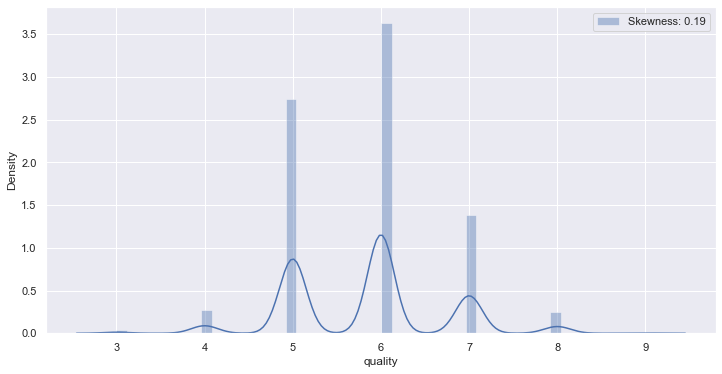

In [90]:
from scipy.stats import skew


rcParams['figure.figsize'] = (12.0, 6.0)

g = sns.distplot(wine_combined["quality"], label="Skewness: %.2f"%(wine_combined["quality"].skew()))

g = g.legend(loc="best")

plt.show()

In [91]:
wine_combined['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

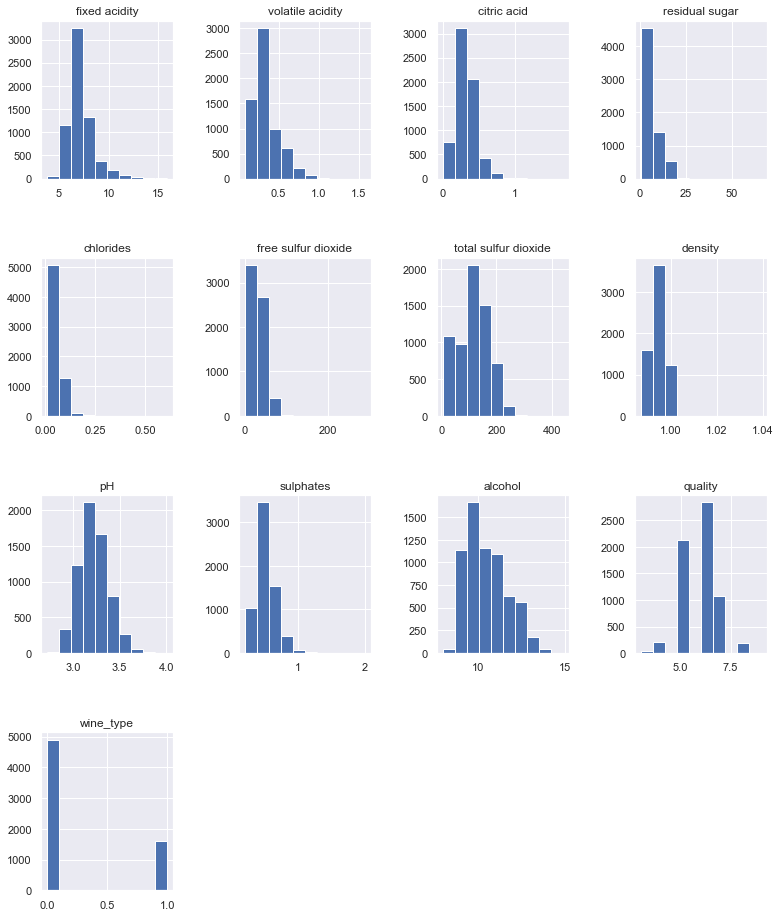

In [92]:
wine_combined.hist(column=wine_combined.columns,figsize=(13,16))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()

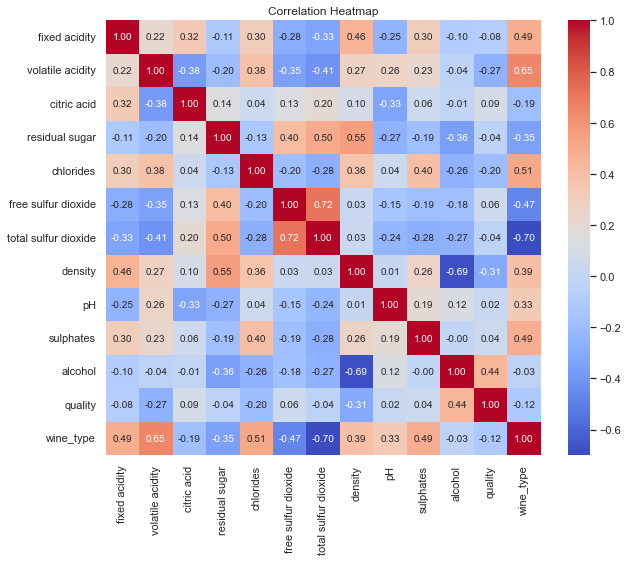

In [93]:
plt.figure(figsize=(10, 8))
sns.heatmap(wine_combined.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

In [94]:
from scipy.stats import pearsonr

correlation_matrix = wine_combined.corr()

for var1 in correlation_matrix.columns:
    for var2 in correlation_matrix.columns:
        if var1 != var2:
            
            corr_coeff, p_value = pearsonr(wine_combined[var1], wine_combined[var2])
            
            print(f"Correlation {var1} and {var2}:")
        
            print("P-value:", p_value<0.05)
            print()



Correlation fixed acidity and volatile acidity:
P-value: True

Correlation fixed acidity and citric acid:
P-value: True

Correlation fixed acidity and residual sugar:
P-value: True

Correlation fixed acidity and chlorides:
P-value: True

Correlation fixed acidity and free sulfur dioxide:
P-value: True

Correlation fixed acidity and total sulfur dioxide:
P-value: True

Correlation fixed acidity and density:
P-value: True

Correlation fixed acidity and pH:
P-value: True

Correlation fixed acidity and sulphates:
P-value: True

Correlation fixed acidity and alcohol:
P-value: True

Correlation fixed acidity and quality:
P-value: True

Correlation fixed acidity and wine_type:
P-value: True

Correlation volatile acidity and fixed acidity:
P-value: True

Correlation volatile acidity and citric acid:
P-value: True

Correlation volatile acidity and residual sugar:
P-value: True

Correlation volatile acidity and chlorides:
P-value: True

Correlation volatile acidity and free sulfur dioxide:
P-val

#### Feature Scaling

In [95]:
X = wine_combined.drop(['quality'], axis=1)


y = wine_combined['quality']

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [97]:
X_train, X_test, y_train, y_test
print(y_test.shape) 
print(y_train.shape) 
print(X_test.shape) 
print(X_train.shape) 

(1950,)
(4547,)
(1950, 12)
(4547, 12)


In [98]:
col = X_train.columns

In [99]:
cols = wine_combined.columns

cols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object')

In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [101]:
type(X_train)

numpy.ndarray

In [102]:
X_train = pd.DataFrame(X_train, columns=[col])
X_test = pd.DataFrame(X_test, columns=[col])

In [103]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type
0,-0.779168,-0.355012,0.089951,-0.783386,-0.778973,-0.369403,-0.090652,-1.564579,0.134114,-0.201038,1.365480,-0.572694
1,0.163348,-0.536055,0.366683,1.699624,0.116293,1.203194,1.333189,0.935312,-1.356269,-0.607736,-1.159588,-0.572694
2,-0.386453,-0.415359,-0.463512,0.542289,-0.085864,1.315523,1.508972,0.468665,0.009915,-0.675519,-0.991250,-0.572694
3,0.006262,-0.536055,-0.255963,1.889006,-0.028105,1.371687,1.561707,1.301962,-0.611077,-1.014434,-1.243756,-0.572694
4,0.084805,-0.656750,0.366683,-0.741301,-0.432418,1.147030,0.858576,-1.297924,0.258312,-0.878868,1.449649,-0.572694
...,...,...,...,...,...,...,...,...,...,...,...,...
4542,0.948777,-0.898140,0.712597,-0.804429,-0.259141,-1.211866,-0.266434,-0.231304,-0.983673,0.815706,0.523791,-0.572694
4543,4.797382,0.007074,1.404426,-0.467749,1.098197,-0.762552,-1.110192,2.235255,-1.045772,1.900233,-0.822912,1.746132
4544,-0.857711,-0.717098,-0.463512,1.405030,-0.605695,1.315523,0.331227,0.038684,-0.052184,-0.878868,0.187115,-0.572694
4545,0.006262,-0.656750,0.435866,1.867964,0.058534,1.371687,1.368346,1.068639,-0.797375,-0.607736,-1.243756,-0.572694


### Decision Tree Classifier (With Gini Index)

In [104]:

from sklearn.tree import DecisionTreeClassifier

In [105]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [106]:
y_pred_gini = clf_gini.predict(X_test)

In [127]:
from sklearn.metrics import accuracy_score

aa = ("Decision Tree Accuracy Score: {0:0.4f}".format(accuracy_score(y_test, y_pred_gini)))

In [128]:
aa

'Decision Tree Accuracy Score: 0.5303'

## Logistic Regression 

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [130]:
logreg = LogisticRegression(solver='liblinear', random_state=0)

In [131]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [132]:
y_pred = logreg.predict(X_test)

y_pred

array([6, 6, 5, ..., 6, 6, 5], dtype=int64)

In [133]:
logreg.predict_proba(X_test)[:,0]

array([0.00517566, 0.00218371, 0.00470908, ..., 0.00886454, 0.00110307,
       0.00702154])

In [134]:
logreg.predict_proba(X_test)[:,1]

array([0.00462677, 0.0037718 , 0.01493742, ..., 0.02658971, 0.01544065,
       0.05981188])

In [135]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42);kf

StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [136]:
cnt = 1

for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 5197, Test set:1300
Fold:2, Train set: 5197, Test set:1300
Fold:3, Train set: 5198, Test set:1299
Fold:4, Train set: 5198, Test set:1299
Fold:5, Train set: 5198, Test set:1299


In [137]:
score = cross_val_score(LogisticRegression(random_state= 42), X, y, cv = kf, scoring="accuracy")

In [138]:
print(f"Every Fold Score: {score}")
print(f'Average Score: {"{:.2f}".format(score.mean())}')

Every Fold Score: [0.47307692 0.47923077 0.46343341 0.47575058 0.46189376]
Average Score: 0.47


In [139]:
score.mean()

0.4706770888849411

In [140]:
from sklearn.metrics import accuracy_score

bb = ("Logistics Regression Accuracy Score: {0:0.4f}".format(accuracy_score(y_test, y_pred)))

In [148]:
print(aa)
print(bb)

Decision Tree Accuracy Score: 0.5303
Logistics Regression Accuracy Score: 0.5308
